In [85]:
%matplotlib inline

In [86]:
# Import Dependencies
import json
import requests
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as st


In [87]:
# Import csv file and make DataFrame
uber_data = Path("../Resources/Uber_Project_CSV.csv")
uber_df = pd.read_csv(uber_data)
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [88]:
#Import URL and API CSV file
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/new%2520york%2520city/2015-01-01/2015-06-30?elements=datetime%2CdatetimeEpoch%2Ctemp%2Ctempmax%2Ctempmin%2Cprecip%2Cwindspeed%2Cwindgust%2Cfeelslike%2Cfeelslikemax%2Cfeelslikemin%2Cpressure%2Cstations%2Cdegreedays%2Caccdegreedays&include=fcst%2Cobs%2Chistfcst%2Cstats%2Chours&key=9R8U63UTPUJVYD92WRCVMZZXB&options=preview&contentType=json"
weather_api = Path("../Resources/NYC_Weather_API_data.csv")
weather_df= pd.read_csv(weather_api)
weather_df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york city,1/1/2015,38.7,27.3,32.8,35.8,17.1,25.6,9.6,37.7,...,9.9,5,NaN,2015-01-01T07:20:09,2015-01-01T16:39:07,0.38,Clear,Clear conditions throughout the day.,clear-day,"72505394728,KLGA,KNYC,72503014732"
1,new york city,1/2/2015,42.2,36.0,38.6,36.5,28.1,32.2,16.8,41.0,...,9.5,5,NaN,2015-01-02T07:20:15,2015-01-02T16:39:58,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"
2,new york city,1/3/2015,40.7,33.5,35.8,35.0,25.9,30.2,26.1,69.4,...,5.2,3,NaN,2015-01-03T07:20:19,2015-01-03T16:40:50,0.45,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72505394728,KLGA,KNYC,72503014732"
3,new york city,1/4/2015,55.4,41.0,48.2,55.4,36.6,46.6,44.6,87.4,...,3.8,3,NaN,2015-01-04T07:20:20,2015-01-04T16:41:44,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72505394728,KLGA,KNYC,72503014732"
4,new york city,1/5/2015,50.3,21.8,36.3,50.3,11.4,27.8,12.2,37.1,...,9.9,5,NaN,2015-01-05T07:20:19,2015-01-05T16:42:40,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"


In [89]:
#Isolate short rain pickups
rain_data_df = uber_df[["pickup_dt","borough", "pickups", "pcp01", "pcp06", "pcp24"]]
short_rain_df = rain_data_df[(rain_data_df["pcp01"] > 0) & (rain_data_df["pcp06"] == 0) & (rain_data_df["pcp24"] == 0)]
short_rain_chart_df =short_rain_df[["pickup_dt", "borough", "pickups"]]
short_rain_chart_df = short_rain_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
short_rain_chart_df

,pickups
borough,
Bronx,8584
Brooklyn,94105
EWR,1
Manhattan,447622
Queens,53488
Staten Island,275


In [90]:
#Find total and average pickups for short rain
short_rain_df = short_rain_df.astype({"pickup_dt":"datetime64[D]"})
avg_short_rain = short_rain_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_short_rain = avg_short_rain.count()
total_short_rain = sum(avg_short_rain["pickups"])
avg_short_rain_total = total_short_rain/days_of_short_rain
avg_short_rain_total = int(avg_short_rain_total.round(2))
avg_short_rain_total

15495

In [91]:
#Isolate medium rain pickups
medium_rain_df = rain_data_df[(rain_data_df["pcp06"] > 0) & (rain_data_df["pcp01"] == 0) & (rain_data_df["pcp24"] == 0)]
medium_rain_chart_df = medium_rain_df[["borough", "pickups"]]
medium_rain_chart_df = medium_rain_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
medium_rain_chart_df

,pickups
borough,
Bronx,21022
Brooklyn,234293
EWR,5
Manhattan,917997
Queens,130854
Staten Island,681


In [92]:
#Find total and average pickups for medium rain
medium_rain_df = medium_rain_df.astype({"pickup_dt":"datetime64[D]"})
avg_medium_rain = medium_rain_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_medium_rain = avg_medium_rain.count()
total_medium_rain = sum(avg_medium_rain["pickups"])
avg_medium_rain_total = total_medium_rain/days_of_medium_rain
avg_medium_rain_total = int(avg_medium_rain_total.round(2))
avg_medium_rain_total

20397

In [93]:
#ISolate heavy rain pickups
heavy_rain_df = rain_data_df[(rain_data_df["pcp24"] > 0) & (rain_data_df["pcp01"] == 0) & (rain_data_df["pcp06"] == 0)]
heavy_rain_chart_df = heavy_rain_df[["borough", "pickups","pcp24"]]
heavy_rain_chart_df = heavy_rain_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
heavy_rain_chart_df

,pickups
borough,
Bronx,50038
Brooklyn,514271
EWR,31
Manhattan,2433263
Queens,318784
Staten Island,1513


In [94]:
#Find total pickups and average pickups for heavy rain
heavy_rain_df = heavy_rain_df.astype({"pickup_dt":"datetime64[D]"})
avg_heavy_rain = heavy_rain_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_heavy_rain = avg_heavy_rain.count()
total_heavy_rain = sum(avg_heavy_rain["pickups"])
avg_heavy_rain_total = total_heavy_rain/days_of_heavy_rain
avg_heavy_rain_total = int(avg_heavy_rain_total.round(0))
avg_heavy_rain_total

29638

In [95]:
#Isolate snow pickups
snow_data_df = uber_df[["pickup_dt", "borough", "pickups", "sd"]]
snow_df = snow_data_df[(snow_data_df["sd"] > 0)]
snow_chart_df = snow_df[["borough", "pickups",]]
snow_chart_df = snow_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
snow_chart_df


,pickups
borough,
Bronx,53225
Brooklyn,623687
EWR,27
Manhattan,3149007
Queens,351742
Staten Island,1643


In [96]:
# Find the total and average snow pickups
snow_df = snow_df.astype({"pickup_dt":"datetime64[D]"})
avg_snow = snow_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_snow = avg_snow.count()
total_snow = sum(avg_snow["pickups"])
avg_snow_total = total_snow/days_of_snow
avg_snow_total = int(avg_snow_total.round(0))
avg_snow_total

70864

In [97]:
#Isolate pickups for no precipitation
no_precipitation_data_df = uber_df[(uber_df["pcp01"] == 0) & (uber_df["pcp06"] == 0) & (uber_df["pcp24"] == 0) & (uber_df["sd"] == 0)]
no_precipitation_chart_df = no_precipitation_data_df[["borough", "pickups"]]
no_precipitation_chart_df = no_precipitation_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
no_precipitation_chart_df

,pickups
borough,
Bronx,92588
Brooklyn,925314
EWR,39
Manhattan,3907896
Queens,530198
Staten Island,2971


In [98]:
#Find the total and average pickups with no precipitation
no_precipitation_data_df= no_precipitation_data_df.astype({"pickup_dt":"datetime64[D]"})
avg_no_precipitation = no_precipitation_data_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_no_precipitation = avg_no_precipitation.count()
total_no_precipitation = sum(avg_no_precipitation["pickups"])
avg_no_precipitation_total = total_no_precipitation/days_of_no_precipitation
avg_no_precipitation_total = int(avg_no_precipitation_total.round(2))
avg_no_precipitation_total

47081

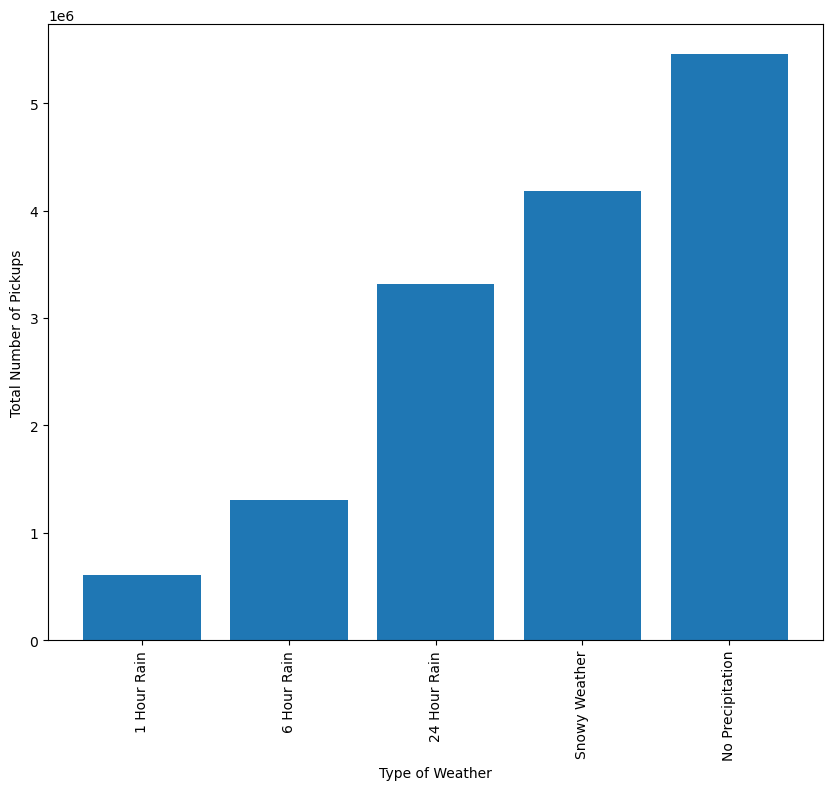

In [99]:
#Create a data frame and bar chart that shows total pickups by different weather type
total_weather = {"Type of Weather": ["1 Hour Rain", "6 Hour Rain", "24 Hour Rain", "Snowy Weather", "No Precipitation"],
                  "Total Pickups": [total_short_rain, total_medium_rain, total_heavy_rain, total_snow, total_no_precipitation]
                  }


total_weather_df = pd.DataFrame(total_weather)

x_axis = np.arange(len(total_weather_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,8))
plt.bar(x_axis, total_weather_df["Total Pickups"], align="center")
plt.xticks(tick_locations, total_weather_df["Type of Weather"], rotation="vertical")
plt.xlabel("Type of Weather")
plt.ylabel("Total Number of Pickups")
plt.show()



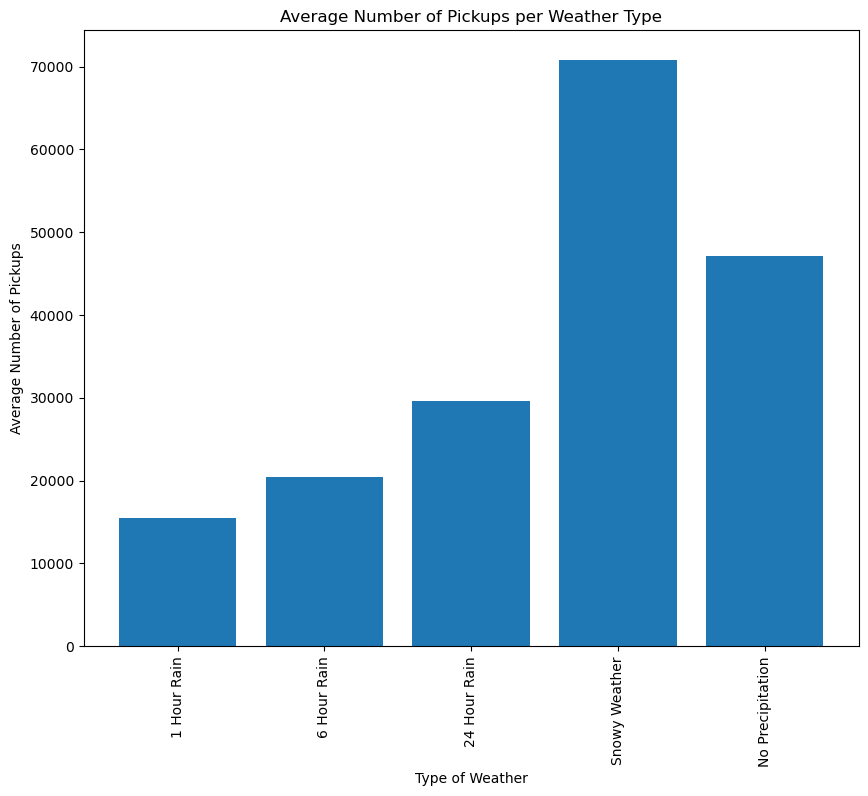

In [100]:
#create a dataframe and bar chart that shows average pickups by different weather type
avg_total_weather = {"Type of Weather": ["1 Hour Rain", "6 Hour Rain", "24 Hour Rain", "Snowy Weather", "No Precipitation"],
                     "Average Pickups": [avg_short_rain_total, avg_medium_rain_total, avg_heavy_rain_total, avg_snow_total, avg_no_precipitation_total]

}
avg_weather_df = pd.DataFrame(avg_total_weather)

x_axis = np.arange(len(avg_weather_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10, 8))
plt.bar(x_axis, avg_weather_df["Average Pickups"], align="center")
plt.xticks(tick_locations, avg_weather_df["Type of Weather"], rotation ="vertical")
plt.xlabel("Type of Weather")
plt.ylabel("Average Number of Pickups")
plt.title("Average Number of Pickups per Weather Type")
plt.show()


In [101]:
# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan
wind_df= uber_df[["pickup_dt", "borough", "pickups", "spd"]]

wind_df.head()


,pickup_dt,borough,pickups,spd
0,1/1/2015 1:00,Bronx,152,5.0
1,1/1/2015 1:00,Brooklyn,1519,5.0
2,1/1/2015 1:00,EWR,0,5.0
3,1/1/2015 1:00,Manhattan,5258,5.0
4,1/1/2015 1:00,Queens,405,5.0


In [102]:
#Does different boroughs? Ryan

In [103]:
# Does the day of the week affect pickups? - Fidel
uber_df['timestamp']= pd.to_datetime(uber_df['pickup_dt'])
uber_df['timestamp'].dt.day_name()
uber_df['day_of_the_week']=uber_df['timestamp'].dt.day_name()
uber_df_2=uber_df[["day_of_the_week", "pickups"]]


print(uber_df_2)


      day_of_the_week  pickups
0            Thursday      152
1            Thursday     1519
2            Thursday        0
3            Thursday     5258
4            Thursday      405
...               ...      ...
29096         Tuesday        0
29097         Tuesday     3828
29098         Tuesday      580
29099         Tuesday        0
29100         Tuesday        3

[29101 rows x 2 columns]


In [104]:
# Extract individual days
group0 = uber_df_2[uber_df_2["day_of_the_week"] == 'Friday']["pickups"]
group1 = uber_df_2[uber_df_2["day_of_the_week"] == 'Monday']["pickups"]
group2 = uber_df_2[uber_df_2["day_of_the_week"] == 'Saturday']["pickups"]
group3 = uber_df_2[uber_df_2["day_of_the_week"] == 'Sunday']["pickups"]
group4 = uber_df_2[uber_df_2["day_of_the_week"] == 'Thursday']["pickups"]
group5= uber_df_2[uber_df_2["day_of_the_week"] == 'Tuesday']["pickups"]
group6= uber_df_2[uber_df_2["day_of_the_week"] == 'Wednesday']["pickups"]

In [105]:
# Perform the ANOVA
st.f_oneway(group0, group1, group2, group3, group4,group5,group6)

F_onewayResult(statistic=12.766621162505526, pvalue=1.880511996714594e-14)

In [106]:
#create a new data frame to show total pickups_per_day
pick_up_totals=uber_df.groupby("day_of_the_week")["pickups"].sum()
pick_up_totals

day_of_the_week
Friday       2261480
Monday       1698122
Saturday     2410063
Sunday       2004315
Thursday     2140072
Tuesday      1864578
Wednesday    1887143
Name: pickups, dtype: int64

In [107]:
# Labels for the sections of our pie chart
labels = ["Friday", "Monday", "Saturday", "Sunday", "Thursday","Tuesday","Wednesday"]

# The values of each section of the pie chart
sizes = [2261480, 1698122,2410063, 2004315,2140072,1864578,1887143]

# The colors of each section of the pie chart
colors = ["red", "orange", "purple", "blue", "yellow","green", "pink"]

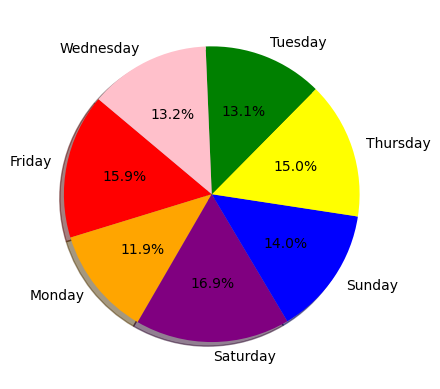

In [108]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [109]:
#creating variables for the barchart
pickup_by_day=uber_df.groupby(["day_of_the_week"])["pickups"].mean()
pick_by_days= pickup_by_day.sort_values(ascending= True)

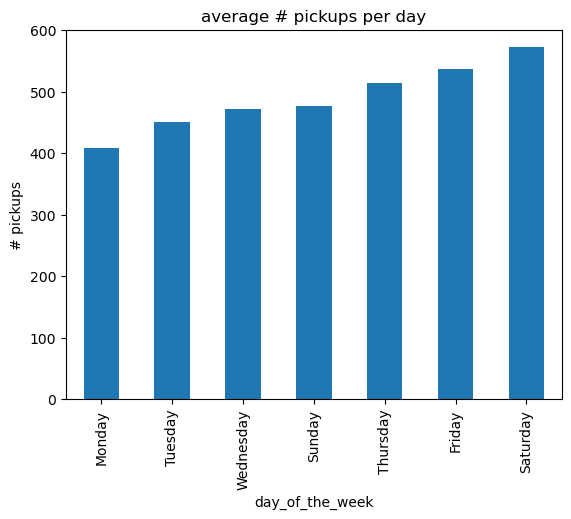

<Figure size 640x480 with 0 Axes>

In [110]:
#Bar graph to show the average pickups occured per day
pick_up_days_chart= pick_by_days.plot(kind= 'bar', fig= (7,7))
# Set the xlabel and ylabel using class methods
pick_up_days_chart.set_xlabel("day_of_the_week")
pick_up_days_chart.set_ylabel("# pickups")

#add title to chart
plt.title('average # pickups per day')

plt.show()
plt.tight_layout()

In [111]:
#Difference in Weekdays vs Weekends? - Fidel
uber_df['timestamp']= pd.to_datetime(uber_df['pickup_dt'])
uber_df['timestamp'].dt.dayofweek
uber_df['weekday'] = uber_df['timestamp'].dt.day_of_week
uber_df['day_type'] = uber_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
trip_by_week= uber_df[["day_type", "pickups"]]
print(trip_by_week)


      day_type  pickups
0      Weekday      152
1      Weekday     1519
2      Weekday        0
3      Weekday     5258
4      Weekday      405
...        ...      ...
29096  Weekday        0
29097  Weekday     3828
29098  Weekday      580
29099  Weekday        0
29100  Weekday        3

[29101 rows x 2 columns]


In [112]:
# Extract weekdays and weekends
group0 = trip_by_week[trip_by_week["day_type"] == 'Weekday']["pickups"]
group1 = trip_by_week[trip_by_week["day_type"] == 'Weekend']["pickups"]

In [113]:
# Perform the ANOVA
st.f_oneway(group0, group1)

F_onewayResult(statistic=14.014507957897177, pvalue=0.00018175457982768056)

In [114]:
#creating variables for the barchart
pickup_week=trip_by_week.groupby(["day_type"])["pickups"].mean()
pick_by_week= pickup_week.sort_values(ascending= True)

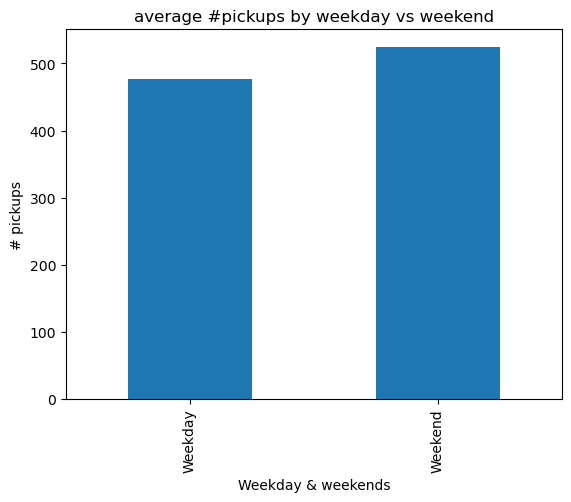

<Figure size 640x480 with 0 Axes>

In [115]:
#Bar graph to show the average pickups occured per day
pick_up_week_chart= pick_by_week.plot(kind= 'bar', fig= (7,7))
# Set the xlabel and ylabel using class methods
pick_up_week_chart.set_xlabel("Weekday & weekends")
pick_up_week_chart.set_ylabel("# pickups")

#add title to chart
plt.title('average #pickups by weekday vs weekend')

plt.show()
plt.tight_layout()

In [116]:
#variables for Pie chart
by_week= trip_by_week.groupby("day_type")["pickups"].sum()
print(by_week)

day_type
Weekday    9851395
Weekend    4414378
Name: pickups, dtype: int64


In [117]:
# Labels for the sections of our pie chart
labels = ["Weekday", "Weekend"]

# The values of each section of the pie chart
sizes = [9851395, 4414378,]

# The colors of each section of the pie chart
colors = [ "purple", "yellow"]

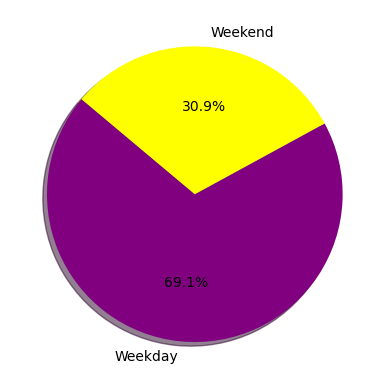

In [118]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [119]:
# does Holiday's affcet the number of pickups?
#creating holiday dataframe
holiday_df= uber_df[["pickup_dt","pickups","hday"]]
by_holiday= holiday_df.groupby("hday")["pickups"].sum()

print(by_holiday)

hday
N    13775672
Y      490101
Name: pickups, dtype: int64


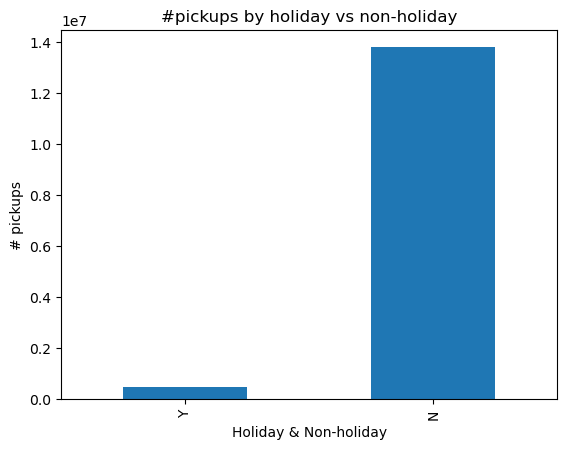

<Figure size 640x480 with 0 Axes>

In [120]:
#bar graph creation
pick_by_holiday= by_holiday.sort_values(ascending= True)
#Bar graph to show the average pickups occured per day
pick_up_holiday_chart= pick_by_holiday.plot(kind= 'bar', fig= (7,7))
# Set the xlabel and ylabel using class methods
pick_up_holiday_chart.set_xlabel("Holiday & Non-holiday")
pick_up_holiday_chart.set_ylabel("# pickups")

#add title to chart
plt.title("#pickups by holiday vs non-holiday")

plt.show()
plt.tight_layout()

In [121]:
# Labels for the sections of our pie chart
labels = ["Holiday", "Non-holiday"]

# The values of each section of the pie chart
sizes = [490101, 13775672]

# The colors of each section of the pie chart
colors = [ "green", "pink"]

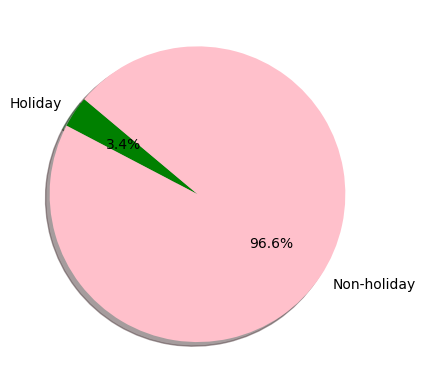

In [122]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [123]:
# Correlation and Regression

## Analysis